# Adversarial Search: Playing "Mean" Connect 4


## Instructions

Total Points: Undegraduates 10, graduate students 11

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

You will implement different versions of agents that play "Mean" Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

> **The mean part:** This game has an additional rule. Every time it is a player's turn, the player can decide to instead of playing a new disk, take a bottom row disk of the opponent and place it in any column. All disks above the removed disk will fall down one position. Note that a player can only move an _opponent's disc_ that is in the _bottom row_ of the board.

Note that normal [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [1 point]

Define the components of the search problem associated with this game:

* Initial state
* Actions
* Transition model
* Test for the terminal state
* Utility for terminal states

In [59]:
"""
Initial State: Mảng 6x7 chứa các giá trị 0.
Actions: 
    Drop: Người chơi lần lượt thả các đồng xu vào một trong bảy cột nếu cột đó chưa bị đầy. 
    Mean: Người chơi di chuyển một dĩa của đối thủ ở hàng cuối cùng sang một cột khác nếu cột đó không đầy.
Transition Model: Đồng xu rơi xuống vị trí trống thấp nhất trong cột đã chọn. Dĩa di chuyển sang cột khác nếu cột đó không đầy.
Test for terminal state: Kiểm tra xem có người chơi nào đã thắng hay không.
Utility for terminal state: Trả về 1 nếu người chơi 1 thắng, -1 nếu người chơi -1 thắng, 0 nếu hòa.
"""


'\nInitial State: Mảng 6x7 chứa các giá trị 0.\nActions: \n    Drop: Người chơi lần lượt thả các đồng xu vào một trong bảy cột nếu cột đó chưa bị đầy. \n    Mean: Người chơi di chuyển một dĩa của đối thủ ở hàng cuối cùng sang một cột khác nếu cột đó không đầy.\nTransition Model: Đồng xu rơi xuống vị trí trống thấp nhất trong cột đã chọn. Dĩa di chuyển sang cột khác nếu cột đó không đầy.\nTest for terminal state: Kiểm tra xem có người chơi nào đã thắng hay không.\nUtility for terminal state: Trả về 1 nếu người chơi 1 thắng, -1 nếu người chơi -1 thắng, 0 nếu hòa.\n'

How big is the state space? Give an estimate and explain it.

In [60]:
"""
Một cột có 6 hàng có thể có k dĩa (0 ≤ k ≤ 6).
k dĩa phải nằm ở k hàng cuối cùng của cột đó, mỗi dĩa có thể là 1 hoặc -1 nên có 2^k cách sắp xếp dĩa trong k hàng đó.
Tổng số trạng thái cho một cột là:
S = Σ (k=0 to 6) 2^k = 2^7 - 1 = 127
Vì có 7 cột và mỗi cột có 127 trạng thái độc lập, tổng số trạng thái của bảng Connect4 là: 127^7
"""

'\nMột cột có 6 hàng có thể có k dĩa (0 ≤ k ≤ 6).\nk dĩa phải nằm ở k hàng cuối cùng của cột đó, mỗi dĩa có thể là 1 hoặc -1 nên có 2^k cách sắp xếp dĩa trong k hàng đó.\nTổng số trạng thái cho một cột là:\nS = Σ (k=0 to 6) 2^k = 2^7 - 1 = 127\nVì có 7 cột và mỗi cột có 127 trạng thái độc lập, tổng số trạng thái của bảng Connect4 là: 127^7\n'

How big is the game tree that minimax search will go through? Give an estimate and explain it.

In [61]:
"""
dmax = 42
b = drop + mean
drop = 7
mean = 7x7 = 49
b = 7 + 49 = 56
N = b^dmax = 56^42
"""

'\ndmax = 42\nb = drop + mean\ndrop = 7\nmean = 7x7 = 49\nb = 7 + 49 = 56\nN = b^dmax = 56^42\n'

## Task 2: Game Environment and Random Agent [3 point]

You can use a numpy character array as the board. Note that the following function can create boards of different sizes.

In [62]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


Instead of colors (red and yellow), you can use 1 and -1 to represent the players Max and Min. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position and player is the player (1, -1) whose next move it is and who the agent should play.

Visualization code by Randolph Rankin:

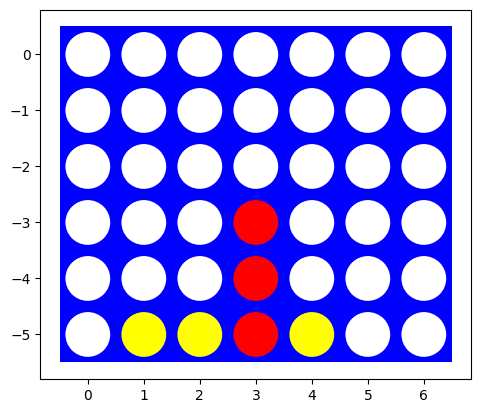

In [63]:
import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()
    
board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]

visualize(board)

Implement helper functions for:

* The transition model $result(s, a)$.
* The utility function $utility(s)$.
* Check for terminal states $terminal(s)$.
* A check for available actions in each state $actions(s)$.

Make sure that all these functions work with boards of different sizes (number of columns and rows).

In [64]:
def actions(board, player):
    all_actions = []
    num_cols = board.shape[1]
    last_row = board.shape[0] - 1
    opponent = -player
    # Tìm các cột chưa đầy (dùng cho cả 'drop' và 'mean' target)
    available_cols = []
    for col in range(num_cols):
        if board[0, col] == 0:
            available_cols.append(col)

    # Tạo hành động "Drop"
    for col_to in available_cols:
        all_actions.append(('drop', col_to))

    # Tạo hành động "Mean"
    for col_from in range(num_cols):
        if board[last_row, col_from] == opponent:
            for col_to in available_cols:
                all_actions.append(('mean', col_from, col_to))
                
    return all_actions

def result(state, player, action):
    new_state = state.copy()
    action_type = action[0]
    bottom_row = state.shape[0] - 1
    
    if action_type == 'drop':
        col = action[1]
        for row in range(bottom_row, -1, -1): # Tìm vị trí trống thấp nhất trong cột bằng cách duyệt từ dưới lên
            if new_state[row, col] == 0:
                new_state[row, col] = player
                break
    elif action_type == 'mean':
        col_from = action[1]
        col_to = action[2]
        opponent = -player
        
        if new_state[bottom_row, col_from] == opponent:

            for row in range(bottom_row, 0, -1):
                new_state[row, col_from] = new_state[row - 1, col_from]
            new_state[0, col_from] = 0
                    
            for row in range(bottom_row, -1, -1):
                if new_state[row, col_to] == 0:
                    new_state[row, col_to] = opponent
                    break
    return new_state

def check_winner(state):
    # Kiểm tra hàng
    for r in range(state.shape[0]):
        for c in range(state.shape[1] - 3): 
            # Điều kiện if kiểm tra 4 đĩa
            if state[r, c] == state[r, c + 1] == state[r, c + 2] == state[r, c + 3] != 0:
                return state[r, c]
    # Kiểm tra cột
    for c in range(state.shape[1]):
        for r in range(state.shape[0] - 3):
            # Điều kiện if kiểm tra 4 đĩa
            if state[r, c] == state[r + 1, c] == state[r + 2, c] == state[r + 3, c] != 0:
                return state[r, c]
    # Kiểm tra đường chéo (xuống-phải)
    for r in range(state.shape[0] - 3):
        for c in range(state.shape[1] - 3):
            # Điều kiện if kiểm tra 4 đĩa
            if state[r, c] == state[r + 1, c + 1] == state[r + 2, c + 2] == state[r + 3, c + 3] != 0:
                return state[r, c]
    # Kiểm tra đường chéo (lên-phải)
    # Giới hạn vòng lặp bắt đầu từ 3 (hàng thứ 4)
    for r in range(3, state.shape[0]): 
        for c in range(state.shape[1] - 3):
            # Điều kiện if kiểm tra 4 đĩa
            if state[r, c] == state[r - 1, c + 1] == state[r - 2, c + 2] == state[r - 3, c + 3] != 0:
                return state[r, c]    
    return None
def is_full_board(state):
    return np.all(state[0] != 0)
def terminal(state):
    winner = check_winner(state)
    if winner is not None:
        return True
    elif is_full_board(state):
        return True
    else:
        return False

def utility(state):
    winner = check_winner(state)
    if winner == 1:
        return 1
    elif winner == -1:
        return -1
    else:
        return 0

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = None): ...`

The argument `player` is used for agents that do not store what side they are playing. The value passed on bt yhe environment should be 1 ot -1 for playerred and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [65]:
def random_player(board, player = None):
    possible_actions = actions(board, player)
    return possible_actions[np.random.randint(len(possible_actions))]

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [66]:
def play(player1, player2, N = 1000):
    results = {1: 0, -1: 0, 0: 0}  # Thắng, thua, hòa
    for _ in range(N):
        board = empty_board()
        current_player = 1
        while not terminal(board):
            if current_player == 1:
                action = player1(board, current_player)
            else:
                action = player2(board, current_player)
            board = result(board, current_player, action)
            current_player = -current_player
        game_result = utility(board)
        results[game_result] += 1
    print("Results after", N, "games:")
    print("Player 1 wins:", results[1])
    print("Player 2 wins:", results[-1])
    print("Draws:", results[0])

play(random_player, random_player)

Results after 1000 games:
Player 1 wins: 759
Player 2 wins: 241
Draws: 0


## Task 3: Minimax Search with Alpha-Beta Pruning [3 points]

### Implement the search starting.

Implement the search starting from a given board and specifying the player and put it into an agent function.
You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).

__Notes:__ 
* Make sure that all your agent functions have a signature consistent with the random agent above.
* The search space for a $6 \times 7$ board is large. You can experiment with smaller boards (the smallest is $4 \times 4$) and/or changing the winning rule to connect 3 instead of 4.

In [67]:
import math


# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search(board, depth = 6, player = 1):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab(board, depth, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return { "move": move, "value": value }

def max_value_ab(state, depth, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return 0, None
        
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}]")

    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in actions(state, player):
        v2, a2 = min_value_ab(result(state, player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

def min_value_ab(state, depth, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return 0, None

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}]")
        
    v, move = +math.inf, None
    

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in actions(state, -player):
        v2, a2 = max_value_ab(result(state, -player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: 
            if DEBUG >= 2: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Number of nodes searched: 23408


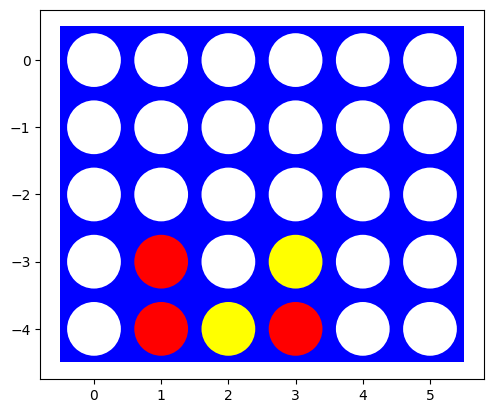

Best move board 1: {'move': ('drop', 0), 'value': 0}
Number of nodes searched: 20516


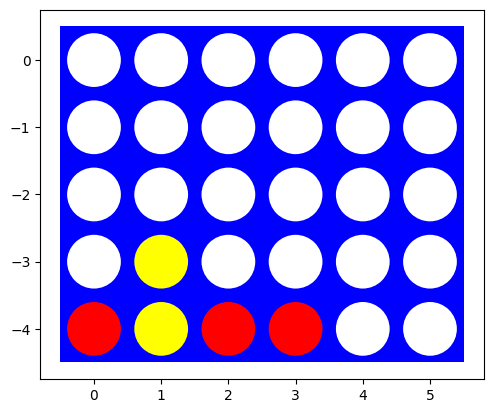

Best move board 2: {'move': ('drop', 0), 'value': 0}
Number of nodes searched: 23888


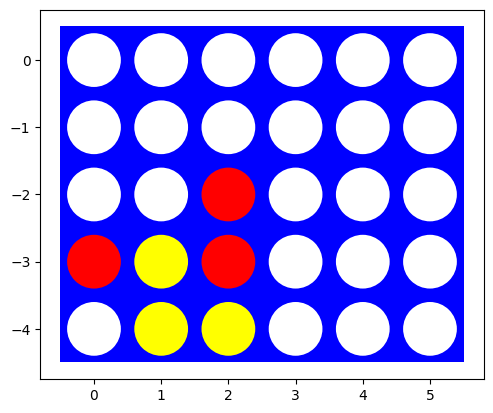

Best move board 3: {'move': ('drop', 0), 'value': 0}
Number of nodes searched: 19120


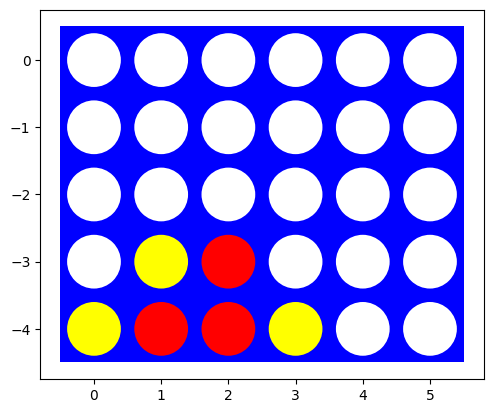

Best move board 4: {'move': ('drop', 0), 'value': 0}
Number of nodes searched: 34009


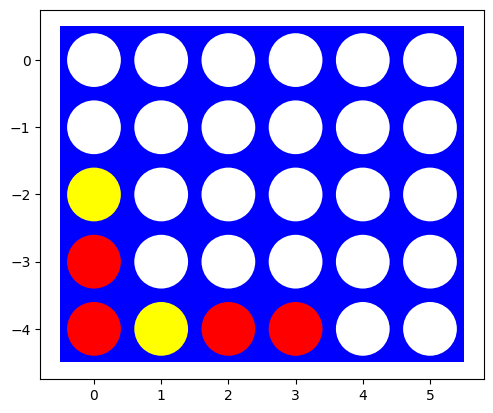

Best move board 5: {'move': ('drop', 0), 'value': 0}


In [68]:

board_1 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, -1, 0, 0],
    [0, 1, -1, 1, 0, 0]
])
board_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, -1, 0, 0, 0, 0],
    [1, -1, 1, 1, 0, 0]
])
board_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [1, -1, 1, 0, 0, 0],
    [0, -1, -1, 0, 0, 0]
])
board_4 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, -1, 1, 0, 0, 0],
    [-1, 1, 1, -1, 0, 0]
])
board_5 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, -1, 1, 1, 0, 0]
])
move_1 = alpha_beta_search(board_1, depth = 6, player=1)
visualize(board_1)
print("Best move board 1:", move_1)
move_2 = alpha_beta_search(board_2, depth = 6, player=1)
visualize(board_2)
print("Best move board 2:", move_2)
move_3 = alpha_beta_search(board_3, depth = 6, player=1)
visualize(board_3)
print("Best move board 3:", move_3)
move_4 = alpha_beta_search(board_4, depth = 6, player=1)
visualize(board_4)
print("Best move board 4:", move_4)
move_5 = alpha_beta_search(board_5, depth = 6, player=1)
visualize(board_5)
print("Best move board 5:", move_5)

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [69]:
board_6 = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [1, -1, 1, 0],
    [0, -1, -1, 0]
])
board_7 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0],
    [1, -1, 1, 1, -1]
])

%time alpha_beta_search(board_6, depth = 6, player=1)
%time alpha_beta_search(board_7, depth = 6, player=1)
%time alpha_beta_search(board_5, depth = 6, player=1)

Number of nodes searched: 5645
CPU times: total: 109 ms
Wall time: 123 ms
Number of nodes searched: 18190
CPU times: total: 391 ms
Wall time: 415 ms
Number of nodes searched: 34009
CPU times: total: 891 ms
Wall time: 1.01 s


{'move': ('drop', 0), 'value': 0}

### Move ordering

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

--- So sánh hiệu năng trên bàn cờ 4x6 ---


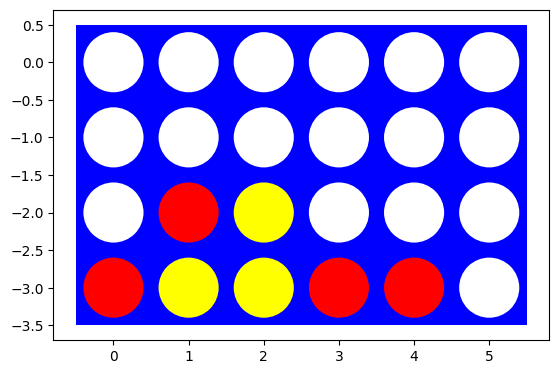


1. Không có sắp xếp thứ tự (Unordered):
Number of nodes searched: 16434
Number of nodes searched: 16434
CPU times: total: 297 ms
Wall time: 341 ms
   Best move: ('drop', 0), Value: 0

2. Có sắp xếp thứ tự (Ordered):
Number of nodes searched: 16473
Number of nodes searched: 16473
CPU times: total: 422 ms
Wall time: 444 ms
   Best move: ('drop', 4), Value: 0


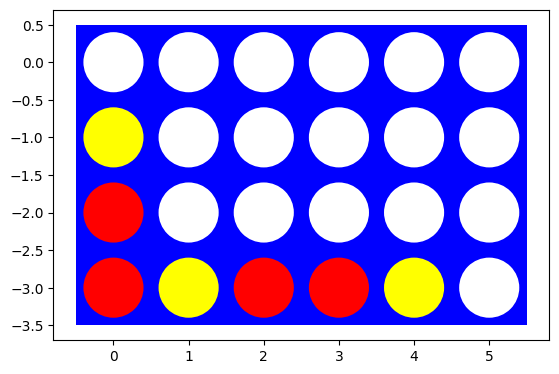


1. Không có sắp xếp thứ tự (Unordered):
Number of nodes searched: 30752
Number of nodes searched: 30752
CPU times: total: 656 ms
Wall time: 673 ms
   Best move: ('drop', 0), Value: 0

2. Có sắp xếp thứ tự (Ordered):
Number of nodes searched: 36399
Number of nodes searched: 36399
CPU times: total: 953 ms
Wall time: 977 ms
   Best move: ('drop', 4), Value: 0


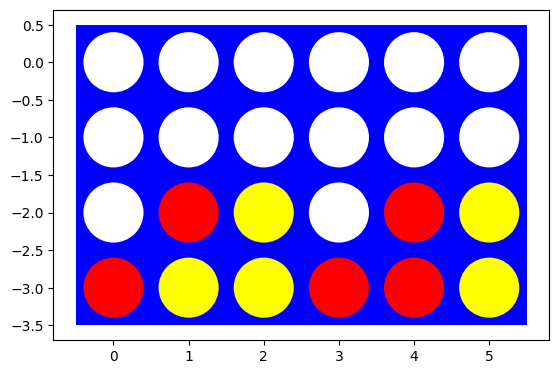


1. Không có sắp xếp thứ tự (Unordered):
Number of nodes searched: 34199
Number of nodes searched: 34199
CPU times: total: 828 ms
Wall time: 836 ms
   Best move: ('drop', 0), Value: 0

2. Có sắp xếp thứ tự (Ordered):
Number of nodes searched: 21314
Number of nodes searched: 21314
CPU times: total: 797 ms
Wall time: 797 ms
   Best move: ('drop', 4), Value: 0


In [70]:
def ordered_actions(board, player):
    """
    Sắp xếp danh sách các hành động để cải thiện hiệu quả cắt tỉa alpha-beta.
    Chiến lược: Ưu tiên 'drop' ở các cột giữa.
    """
    all_actions = actions(board, player) # Lấy danh sách chưa sắp xếp
    num_cols = board.shape[1]
    col_order = []
    center = num_cols // 2
    for i in range(num_cols):
        offset = (i // 2 + 1) * ((-1)**i)
        col = center + offset
        if 0 <= col < num_cols:
            col_order.append(col)
    # Đảm bảo tất cả các cột đều có trong danh sách (cho trường hợp số cột chẵn)
    if len(col_order) < num_cols:
        col_order.insert(0, center - (num_cols - len(col_order)))

    col_priority = {col: p for p, col in enumerate(col_order)}

    def get_sort_key(action):
        """
        Tạo khóa (key) để sắp xếp.
        Chúng ta sắp xếp dựa trên một tuple: (Loại hành động, Ưu tiên cột)
        """
        action_type = action[0]
        
        if action_type == 'drop':
            col = action[1]
            # (0, ưu tiên cột) - 'drop' luôn có ưu tiên 0
            return (0, col_priority.get(col, 99)) 
        
        if action_type == 'mean':
            # Chúng ta cũng có thể ưu tiên 'mean' dựa trên cột thả vào (col_to)
            col_to = action[2]
            # (1, ưu tiên cột) - 'mean' luôn đứng sau 'drop'
            return (1, col_priority.get(col_to, 99))
        
        return (2, 0) # Dự phòng

    # Sắp xếp danh sách hành động dựa trên khóa đã định nghĩa
    return sorted(all_actions, key=get_sort_key)


# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def alpha_beta_search_ordered(board, depth = 6, player = 1):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = max_value_ab_ordered(board, depth, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return { "move": move, "value": value }

def max_value_ab_ordered(state, depth, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return 0, None
        
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}]")

    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in ordered_actions(state, player):
        v2, a2 = min_value_ab_ordered(result(state, player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

def min_value_ab_ordered(state, depth, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return 0, None

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}]")
        
    v, move = +math.inf, None
    

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in ordered_actions(state, -player):
        v2, a2 = max_value_ab_ordered(result(state, -player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: 
            if DEBUG >= 2: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

board_test_1 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0],
    [1, -1, -1, 1, 1, 0]
])
board_test_2 = np.array([
    [0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [1, -1, 1, 1, -1, 0]
])
board_test_3 = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 1, -1],
    [1, -1, -1, 1, 1, -1]
])

print("--- So sánh hiệu năng trên bàn cờ 4x6 ---")
visualize(board_test_1)

print("\n1. Không có sắp xếp thứ tự (Unordered):")
move_unordered = alpha_beta_search(board_test_1, player = 1) 
%time alpha_beta_search(board_test_1, player = 1)
print(f"   Best move: {move_unordered['move']}, Value: {move_unordered['value']}")

print("\n2. Có sắp xếp thứ tự (Ordered):")
move_ordered = alpha_beta_search_ordered(board_test_1, player = 1)
%time alpha_beta_search_ordered(board_test_1, player = 1)
print(f"   Best move: {move_ordered['move']}, Value: {move_ordered['value']}")

visualize(board_test_2)

print("\n1. Không có sắp xếp thứ tự (Unordered):")
move_unordered = alpha_beta_search(board_test_2, player = 1) 
%time alpha_beta_search(board_test_2, player = 1)
print(f"   Best move: {move_unordered['move']}, Value: {move_unordered['value']}")

print("\n2. Có sắp xếp thứ tự (Ordered):")
move_ordered = alpha_beta_search_ordered(board_test_2, player = 1)
%time alpha_beta_search_ordered(board_test_2, player = 1)
print(f"   Best move: {move_ordered['move']}, Value: {move_ordered['value']}")

visualize(board_test_3)

print("\n1. Không có sắp xếp thứ tự (Unordered):")
move_unordered = alpha_beta_search(board_test_3, player = 1) 
%time alpha_beta_search(board_test_3, player = 1)
print(f"   Best move: {move_unordered['move']}, Value: {move_unordered['value']}")

print("\n2. Có sắp xếp thứ tự (Ordered):")
move_ordered = alpha_beta_search_ordered(board_test_3, player = 1)
%time alpha_beta_search_ordered(board_test_3, player = 1)
print(f"   Best move: {move_ordered['move']}, Value: {move_ordered['value']}")

### The first few moves

Start with an empty board. This is the worst case scenario for minimax search with alpha-beta pruning since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do? 

In [71]:
opening_book = {
    empty_board(shape = (6, 7)).tobytes(): ('drop', 3)
}

def ab_opening_book_player(board, player = 1):
    """
    Một agent sử dụng alpha-beta search kết hợp với opening book.
    """
    board_key = board.tobytes()
    
    # 1. Kiểm tra trong opening book trước
    if board_key in opening_book:
        print("Move found in Opening Book!")
        return opening_book[board_key]
    
    # 2. Nếu không có, thực hiện tìm kiếm
    print("Move not in book, starting search...")
    # Sử dụng phiên bản đã sắp xếp để có hiệu năng tốt nhất
    result = alpha_beta_search_ordered(board, player)
    return result['move']

# --- Thử nghiệm ---
print("Testing agent with Opening Book on an empty 6x7 board:")
empty_6x7_board = empty_board(shape = (6, 7))

# Lần chạy này sẽ rất nhanh vì nó lấy nước đi từ sách
%time ab_opening_book_player(empty_6x7_board, player = 1)
best_first_move = ab_opening_book_player(empty_6x7_board, player = 1)
print(f"Best first move is: {best_first_move}")

Testing agent with Opening Book on an empty 6x7 board:
Move found in Opening Book!
CPU times: total: 0 ns
Wall time: 0 ns
Move found in Opening Book!
Best first move is: ('drop', 3)


### Playtime

Let the Minimax Search agent play a random agent on a small board. Analyze wins, losses and draws.

In [72]:
def minimax_player(board, depth = 4, player=1):
    """
    Agent sử dụng thuật toán alpha-beta search (phiên bản đã sắp xếp) để tìm nước đi.
    """
    search_result = alpha_beta_search_ordered(board, depth, player)
    return search_result['move']

# --- Hàm thi đấu tùy chỉnh cho bàn cờ nhỏ ---
# Sửa đổi hàm play để chấp nhận kích thước bàn cờ và in tiến trình
def play_games(player1, player2, N=10, board_shape=(4, 5)):
    """
    Cho 2 agent thi đấu N ván trên bàn cờ có kích thước tùy chỉnh.
    """
    results = {1: 0, -1: 0, 0: 0}  # Thắng cho P1, Thắng cho P2, Hòa
    
    print(f"--- Bắt đầu {N} ván đấu trên bàn cờ {board_shape} ---")
    print(f"Player 1: {player1.__name__}")
    print(f"Player 2: {player2.__name__}")
    
    for i in range(N):
        board = empty_board(shape=board_shape)
        current_player = 1
        
        while not terminal(board):
            if current_player == 1:
                action = player1(board, current_player)
            else:
                action = player2(board, current_player)
            
            board = result(board, current_player, action)
            current_player = -current_player
        
        game_result = utility(board)
        results[game_result] += 1
        print(f"Ván {i+1}/{N} kết thúc. Người thắng: {'P1 (Minimax)' if game_result == 1 else ('P2 (Random)' if game_result == -1 else 'Hòa')}")

    return results

# --- Chạy thử nghiệm ---
# Cho Minimax (Player 1) đấu với Random (Player 2) 10 ván
# Lưu ý: Luật thắng hiện tại là connect-3, phù hợp với bàn 4x4.
num_games = 100
final_results_1 = play_games(minimax_player, random_player, N = num_games, board_shape = (4, 5))
final_results_2 = play_games(minimax_player, random_player, N = num_games, board_shape = (6, 7))

# --- Phân tích kết quả ---
print("\n--- Bàn cờ 4x5 ---")
print("\n--- Phân tích kết quả cuối cùng ---")
p1_wins = final_results_1[1]
p2_wins = final_results_1[-1]
draws = final_results_1[0]

print(f"Tổng số ván: {num_games}")
print(f"Minimax Player thắng: {p1_wins} ({p1_wins/num_games:.1%})")
print(f"Random Player thắng: {p2_wins} ({p2_wins/num_games:.1%})")
print(f"Hòa: {draws} ({draws/num_games:.1%})")

print("\n--- Bàn cờ 6x7 ---")
print("\n--- Phân tích kết quả cuối cùng ---")
p1_wins = final_results_2[1]
p2_wins = final_results_2[-1]
draws = final_results_2[0]

print(f"Tổng số ván: {num_games}")
print(f"Minimax Player thắng: {p1_wins} ({p1_wins/num_games:.1%})")
print(f"Random Player thắng: {p2_wins} ({p2_wins/num_games:.1%})")
print(f"Hòa: {draws} ({draws/num_games:.1%})")

--- Bắt đầu 100 ván đấu trên bàn cờ (4, 5) ---
Player 1: minimax_player
Player 2: random_player
Number of nodes searched: 6
Number of nodes searched: 11
Number of nodes searched: 11
Number of nodes searched: 11
Number of nodes searched: 16
Ván 1/100 kết thúc. Người thắng: P1 (Minimax)
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 6
Ván 2/100 kết thúc. Người thắng: P1 (Minimax)
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 11
Number of nodes searched: 11
Number of nodes searched: 11
Number of nodes searched: 11
Ván 3/100 kết thúc. Người thắng: P1 (Minimax)
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 11
Number of nodes searched: 16
Number of nodes searched: 16
Ván 4/100 kết thúc. Người thắng: P1 (Minimax)
Number of nodes searched: 6
Number of nodes searched: 6
Number of nodes searched: 6
Number of

## Task 4: Heuristic Alpha-Beta Tree Search [3 points] 

### Heuristic evaluation function

Define and implement a heuristic evaluation function.

In [73]:
"""
Hàm heuristic sẽ quét qua toàn bộ bàn cờ để tìm các "cửa sổ" 4 ô.
Nó sẽ tính điểm cho mỗi cửa sổ dựa trên số quân của ta, số quân của địch và các ô trống.
- Điểm rất cao cho 3 quân của ta + 1 ô trống (sắp thắng).
- Điểm vừa phải cho 2 quân của ta + 2 ô trống (tiềm năng tấn công).
- Điểm của đối thủ sẽ bị trừ đi, với trọng số cao hơn một chút để ưu tiên phòng thủ.
- Thêm một điểm thưởng nhỏ cho việc chiếm giữ các cột trung tâm.
"""

def evaluate_window(window, piece):
    """
    Hàm trợ giúp để tính điểm cho một cửa sổ (một đoạn 4 ô).
    """
    score = 0
    opponent = -piece
    
    player_count = np.count_nonzero(window == piece)
    empty_count = np.count_nonzero(window == 0)
    opponent_count = np.count_nonzero(window == opponent)

    if player_count == 4:
        score += 100000  # Thắng tuyệt đối
    elif player_count == 3 and empty_count == 1:
        score += 100     # Cơ hội thắng cao
    elif player_count == 2 and empty_count == 2:
        score += 10      # Tiềm năng tốt

    if opponent_count == 3 and empty_count == 1:
        score -= 800     # Phải chặn ngay lập tức, điểm trừ rất cao
        
    return score

def score_position(board, piece):
    """
    Tính tổng điểm cho một người chơi trên toàn bộ bàn cờ.
    """
    score = 0
    num_rows, num_cols = board.shape
    window_length = 4 # Luật connect-4

    # --- Đánh giá các đường 4 ---
    # Hàng ngang
    for r in range(num_rows):
        for c in range(num_cols - (window_length - 1)):
            window = board[r, c:c+window_length]
            score += evaluate_window(window, piece)

    # Hàng dọc
    for c in range(num_cols):
        for r in range(num_rows - (window_length - 1)):
            window = board[r:r+window_length, c]
            score += evaluate_window(window, piece)

    # Đường chéo dương (/)
    for r in range(num_rows - (window_length - 1)):
        for c in range(num_cols - (window_length - 1)):
            window = np.array([board[r+i, c+i] for i in range(window_length)])
            score += evaluate_window(window, piece)

    # Đường chéo âm (\)
    for r in range(window_length - 1, num_rows):
        for c in range(num_cols - (window_length - 1)):
            window = np.array([board[r-i, c+i] for i in range(window_length)])
            score += evaluate_window(window, piece)
            
    # --- Thưởng cho việc chiếm cột trung tâm ---
    center_col_index = num_cols // 2
    center_column = board[:, center_col_index]
    center_count = np.count_nonzero(center_column == piece)
    score += center_count * 5

    return score

def heuristic_evaluation(board, player):
    """
    Hàm heuristic chính.
    Điểm cuối cùng là tổng điểm của tất cả các cơ hội của người chơi.
    Hàm score_position đã bao gồm cả điểm tấn công và phòng thủ.
    """
    if terminal(board):
        winner = check_winner(board)
        if winner == player:
            return 1000000
        elif winner == -player:
            return -1000000
        else: # Hòa
            return 0
            
    return score_position(board, player)

### Cutting off search 

Modify your Minimax Search with Alpha-Beta Pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

--- Thử nghiệm Heuristic Alpha-Beta với các độ sâu khác nhau ---


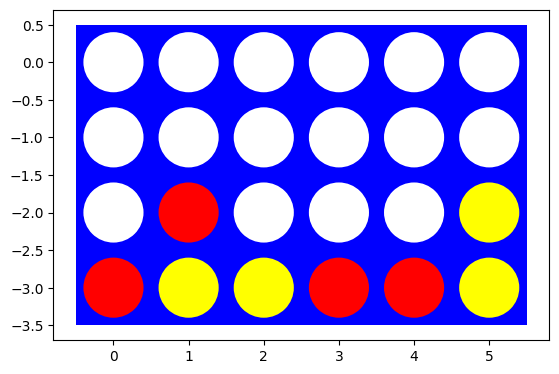


Độ sâu = 3:
Number of nodes searched: 1090
CPU times: total: 531 ms
Wall time: 580 ms
Number of nodes searched: 1090
   Best move: ('drop', 3), Heuristic Value: 60.00

Độ sâu = 4:
Number of nodes searched: 3446
CPU times: total: 1.69 s
Wall time: 1.85 s
Number of nodes searched: 3446
   Best move: ('drop', 2), Heuristic Value: 15.00

Độ sâu = 6:
Number of nodes searched: 86797
CPU times: total: 39.1 s
Wall time: 40.8 s
Number of nodes searched: 86797
   Best move: ('drop', 4), Heuristic Value: -1.00

So sánh với tìm kiếm ban đầu với độ sâu = 6 (không có hàm đánh giá heuristic khi đạt tới độ sâu depth):
Number of nodes searched: 33955
CPU times: total: 719 ms
Wall time: 717 ms
Number of nodes searched: 33955
   Best move: ('drop', 0), Utility Value: 0


In [74]:
# global variables
DEBUG = 1 # 1 ... count nodes, 2 ... debug each node
COUNT = 0

def h_alpha_beta_search(board, depth = 4, player = 1):
    """start the search."""
    global DEBUG, COUNT
    COUNT = 0
    
    value, move = h_max_value_ab(board, depth, player, -math.inf, +math.inf)
    
    if DEBUG >= 1: print(f"Number of nodes searched: {COUNT}") 
    
    return { "move": move, "value": value }

def h_max_value_ab(state, depth, player, alpha, beta):
    """player's best move."""
    global DEBUG, COUNT
    COUNT += 1
       
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return heuristic_evaluation(state, player), None
        
    if DEBUG >= 2: print(f"max: {state} [alpha,beta]=[{alpha},{beta}]")

    v, move = -math.inf, None

    # check all possible actions in the state, update alpha and return move with the largest value
    for a in ordered_actions(state, player):
        v2, a2 = h_min_value_ab(result(state, player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"max: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 > v:
            v, move = v2, a
            alpha = max(alpha, v)
        if v >= beta:
            if DEBUG >= 2: print(f"     v>=beta ({v}>={beta}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

def h_min_value_ab(state, depth, player, alpha, beta):
    """opponent's best response."""
    global DEBUG, COUNT
    COUNT += 1
    
    # return utility of state is a terminal state
    if terminal(state):
        v = utility(state)
        if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}] v={v} (Terminal)")
        return v, None
    if depth == 0: 
        return heuristic_evaluation(state, player), None

    if DEBUG >= 2: print(f"min: {state} [alpha,beta]=[{alpha},{beta}]")
        
    v, move = +math.inf, None
    

    # check all possible actions in the state, update beta and return move with the smallest value
    for a in ordered_actions(state, -player):
        v2, a2 = h_max_value_ab(result(state, -player, a), depth - 1, player, alpha, beta)
        if DEBUG >= 2: print(f"min: {state} (backtracked) [alpha,beta]=[{alpha},{beta}] v={v2}")
        
        if v2 < v:
            v, move = v2, a
            beta = min(beta, v)
        if v <= alpha: 
            if DEBUG >= 2: print(f"     v<=alpha ({v}<={alpha}): pruning remaining subtree (actions). backtracking.")
            return v, move
    
    return v, move

# --- Thử nghiệm với các giá trị cutoff khác nhau ---
board_to_test = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, -1],
    [1, -1, -1, 1, 1, -1]
])

print("--- Thử nghiệm Heuristic Alpha-Beta với các độ sâu khác nhau ---")
visualize(board_to_test)

print("\nĐộ sâu = 3:")
%time h_alpha_beta_search(board_to_test, depth = 3, player = 1)
move_d3 = h_alpha_beta_search(board_to_test, depth = 3, player = 1)
print(f"   Best move: {move_d3['move']}, Heuristic Value: {move_d3['value']:.2f}")

print("\nĐộ sâu = 4:")
%time h_alpha_beta_search(board_to_test, depth = 4, player = 1)
move_d4 = h_alpha_beta_search(board_to_test, depth = 4, player = 1)
print(f"   Best move: {move_d4['move']}, Heuristic Value: {move_d4['value']:.2f}")

print("\nĐộ sâu = 6:")
%time h_alpha_beta_search(board_to_test, depth = 6, player = 1)
move_d6 = h_alpha_beta_search(board_to_test, depth = 6, player = 1)
print(f"   Best move: {move_d6['move']}, Heuristic Value: {move_d6['value']:.2f}")

print("\nSo sánh với tìm kiếm ban đầu với độ sâu = 6 (không có hàm đánh giá heuristic khi đạt tới độ sâu depth):")
%time alpha_beta_search(board_to_test, depth = 6, player = 1)
move_S_d6 = alpha_beta_search(board_to_test, depth = 6, player = 1)
print(f"   Best move: {move_S_d6['move']}, Utility Value: {move_S_d6['value']}")

Experiment with the same manually created boards as above to check if the agent spots winning opportunities.


--- Board 1 ---


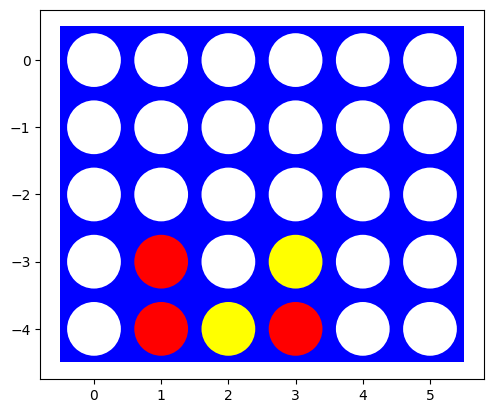

Number of nodes searched: 85124
Nước đi tốt nhất được tìm thấy bởi Heuristic Search:
   Move: ('drop', 2), Heuristic Value: 1.00

--- Board 2 ---


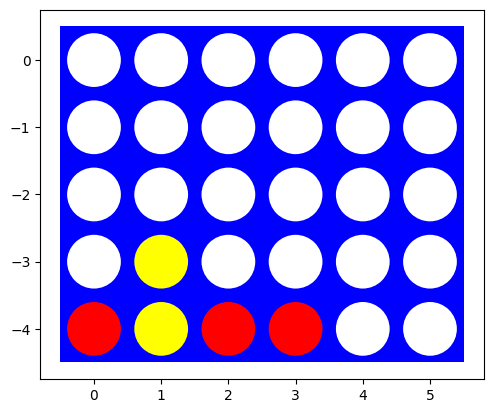

Number of nodes searched: 72151
Nước đi tốt nhất được tìm thấy bởi Heuristic Search:
   Move: ('drop', 4), Heuristic Value: 1.00

--- Board 3 ---


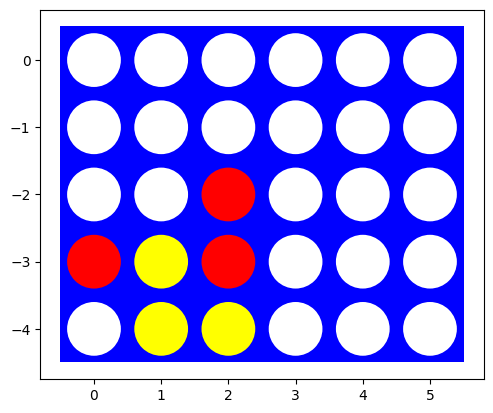

Number of nodes searched: 59428
Nước đi tốt nhất được tìm thấy bởi Heuristic Search:
   Move: ('drop', 2), Heuristic Value: -1.00

--- Board 4 ---


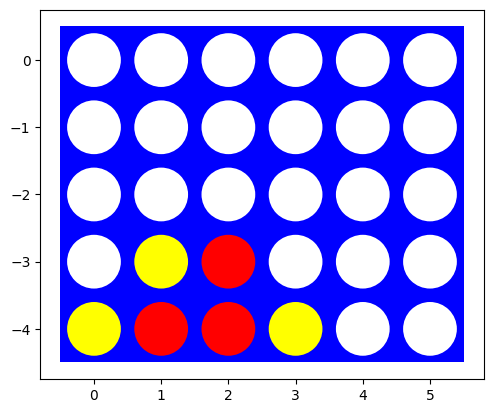

Number of nodes searched: 79295
Nước đi tốt nhất được tìm thấy bởi Heuristic Search:
   Move: ('drop', 2), Heuristic Value: 0.00

--- Board 5 ---


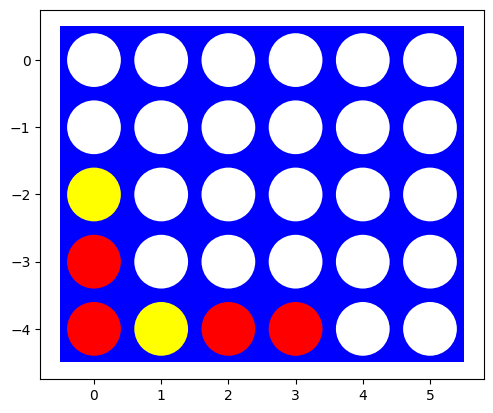

Number of nodes searched: 68277
Nước đi tốt nhất được tìm thấy bởi Heuristic Search:
   Move: ('drop', 4), Heuristic Value: 1.00


In [75]:
# Danh sách các bàn cờ đã tạo ở Task 3
manual_boards = [board_1, board_2, board_3, board_4, board_5]
board_names = ["Board 1", "Board 2", "Board 3", "Board 4", "Board 5"]

for i, board in enumerate(manual_boards):
    print(f"\n--- {board_names[i]} ---")
    visualize(board)
    
    # Tìm nước đi tốt nhất bằng heuristic search
    move = h_alpha_beta_search(board, depth = 6, player = 1)
    
    print(f"Nước đi tốt nhất được tìm thấy bởi Heuristic Search:")
    print(f"   Move: {move['move']}, Heuristic Value: {move['value']:.2f}")

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.

In [76]:
%time h_alpha_beta_search(board_6, depth = 6, player=1)
%time h_alpha_beta_search(board_7, depth = 6, player=1)
%time h_alpha_beta_search(board_5, depth = 6, player=1)

Number of nodes searched: 6602
CPU times: total: 1.94 s
Wall time: 1.94 s
Number of nodes searched: 10862
CPU times: total: 5.67 s
Wall time: 6.13 s
Number of nodes searched: 68277
CPU times: total: 54.1 s
Wall time: 56.3 s


{'move': ('drop', 4), 'value': 1}

### Playtime

Let two heuristic search agents (different cutoff depth, different heuristic evaluation function) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

--- Bắt đầu ván đấu trên bàn cờ (4, 5) ---
Player 1 (Đỏ): heuristic_player_d6
Player 2 (Vàng): heuristic_player_d4

Bàn cờ ban đầu:


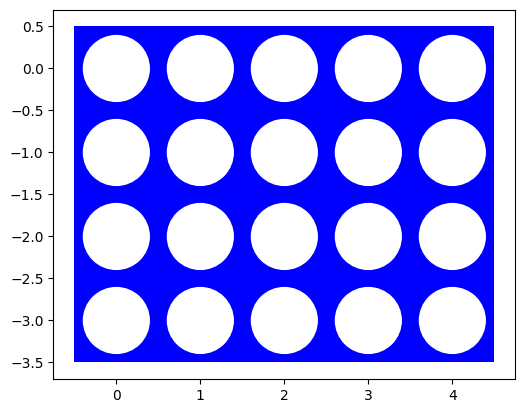

--- Lượt 1 ---
Number of nodes searched: 10967
Player 1 chọn hành động: ('drop', 2)


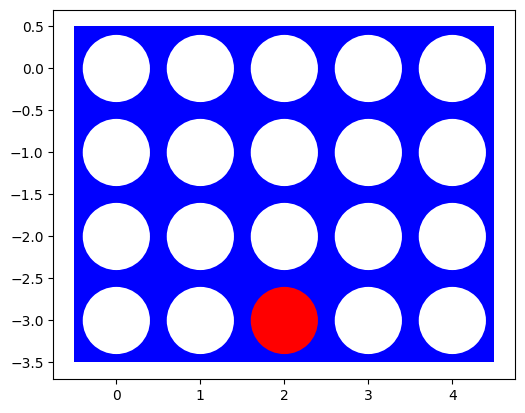

--- Lượt 2 ---
Number of nodes searched: 616
Player 2 chọn hành động: ('drop', 3)


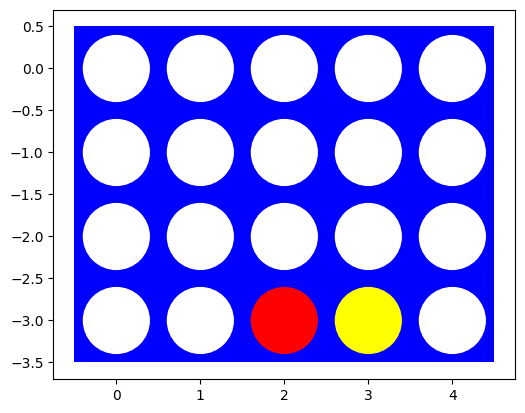

--- Lượt 3 ---
Number of nodes searched: 7680
Player 1 chọn hành động: ('drop', 3)


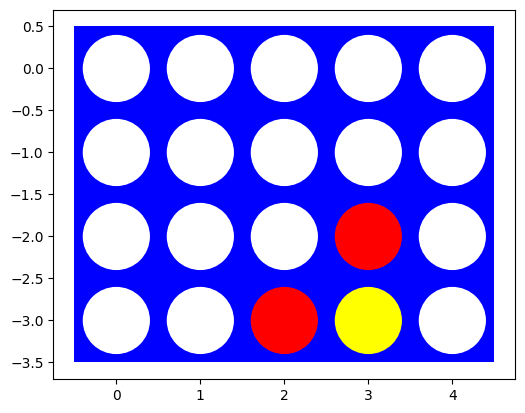

--- Lượt 4 ---
Number of nodes searched: 1004
Player 2 chọn hành động: ('drop', 2)


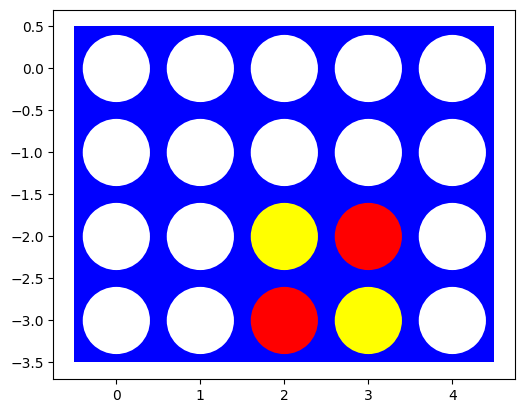

--- Lượt 5 ---
Number of nodes searched: 18258
Player 1 chọn hành động: ('drop', 4)


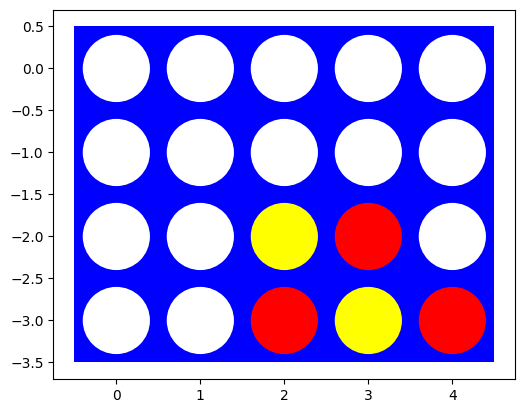

--- Lượt 6 ---
Number of nodes searched: 2781
Player 2 chọn hành động: ('drop', 2)


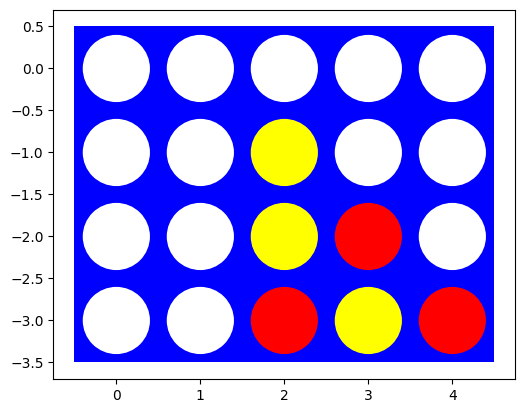

--- Lượt 7 ---
Number of nodes searched: 24462
Player 1 chọn hành động: ('drop', 1)


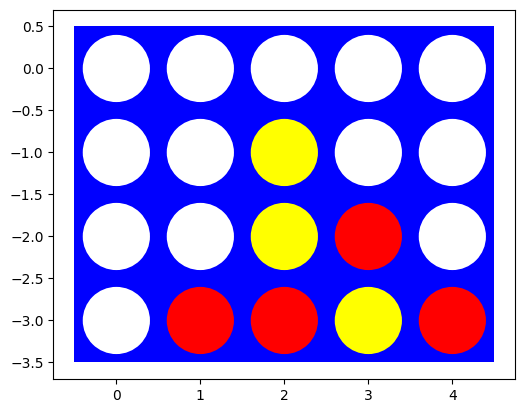

--- Lượt 8 ---
Number of nodes searched: 2072
Player 2 chọn hành động: ('drop', 3)


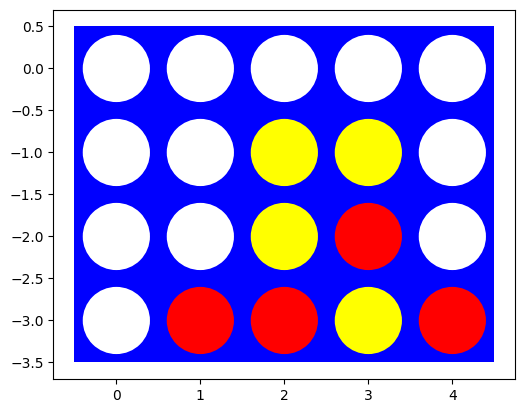

--- Lượt 9 ---
Number of nodes searched: 17583
Player 1 chọn hành động: ('drop', 1)


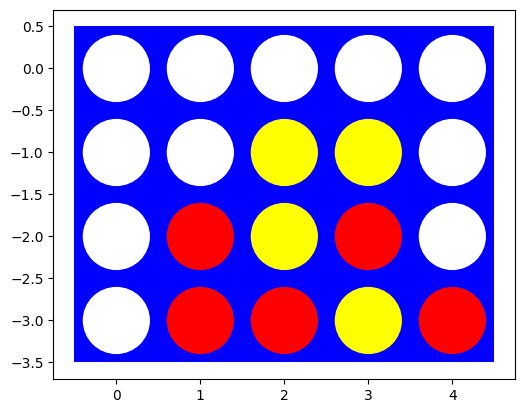

--- Lượt 10 ---
Number of nodes searched: 957
Player 2 chọn hành động: ('drop', 1)


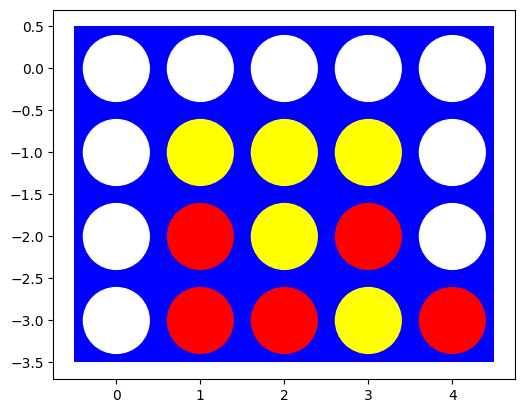

--- Lượt 11 ---
Number of nodes searched: 22929
Player 1 chọn hành động: ('drop', 0)


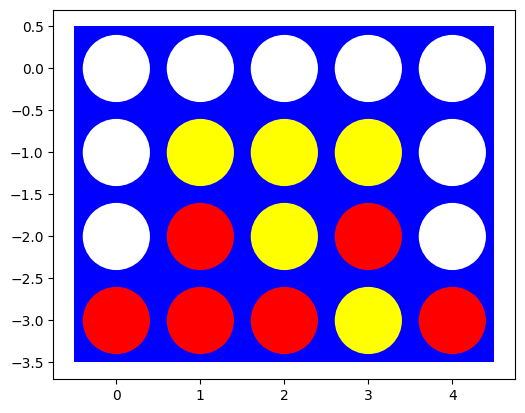

--- Lượt 12 ---
Number of nodes searched: 1650
Player 2 chọn hành động: ('drop', 3)


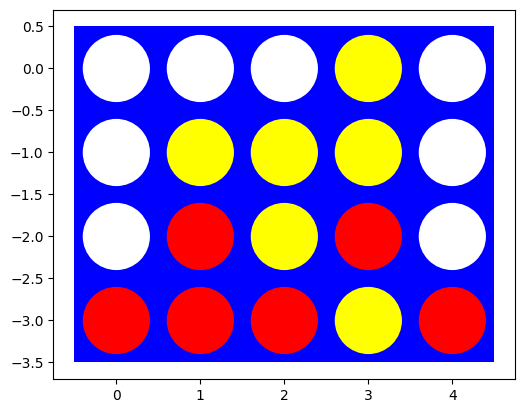

--- Lượt 13 ---
Number of nodes searched: 4945
Player 1 chọn hành động: ('drop', 1)


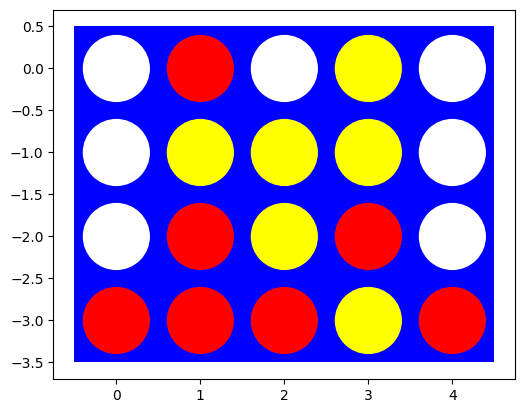

--- Lượt 14 ---
Number of nodes searched: 817
Player 2 chọn hành động: ('mean', 4, 4)


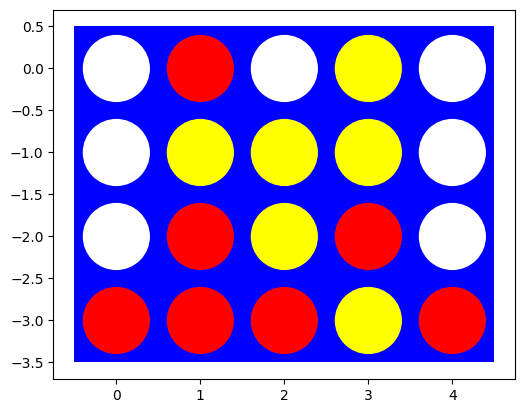

--- Lượt 15 ---
Number of nodes searched: 2377
Player 1 chọn hành động: ('drop', 2)


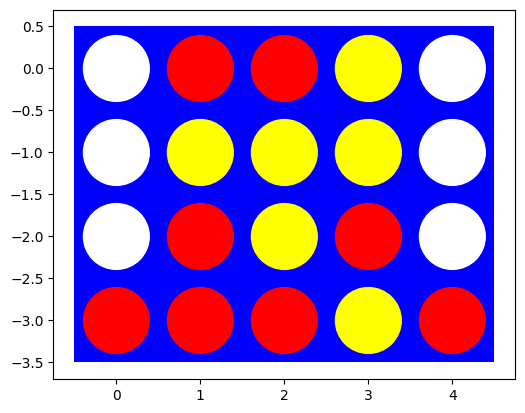

--- Lượt 16 ---
Number of nodes searched: 262
Player 2 chọn hành động: ('mean', 2, 4)


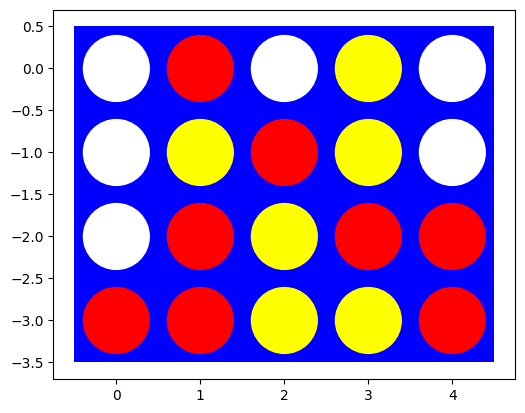


--- KẾT THÚC VÁN ĐẤU ---
Người thắng: Player 1 (heuristic_player_d6)


In [77]:
# Agent 1: Heuristic search với độ sâu 6 (Mạnh hơn)
def heuristic_player_d6(board, player = 1):
    search_result = h_alpha_beta_search(board, depth = 6, player = player)
    return search_result['move']

# Agent 2: Heuristic search với độ sâu 4 (Yếu hơn)
def heuristic_player_d4(board, player = 1):
    search_result = h_alpha_beta_search(board, depth = 4, player = player)
    return search_result['move']

def play_single_game(player1, player2, board_shape = (6, 7)):
    """
    Cho 2 agent thi đấu 1 ván và hiển thị từng bước.
    """
    board = empty_board(shape=board_shape)
    current_player = 1
    
    print(f"--- Bắt đầu ván đấu trên bàn cờ {board_shape} ---")
    print(f"Player 1 (Đỏ): {player1.__name__}")
    print(f"Player 2 (Vàng): {player2.__name__}")
    print("\nBàn cờ ban đầu:")
    visualize(board)
    
    move_count = 0
    while not terminal(board):
        move_count += 1
        print(f"--- Lượt {move_count} ---")
        
        if current_player == 1:
            action = player1(board, current_player)
            print(f"Player 1 chọn hành động: {action}")
        else:
            action = player2(board, current_player)
            print(f"Player 2 chọn hành động: {action}")
        
        board = result(board, current_player, action)
        visualize(board)
        current_player = -current_player
        
    game_result = utility(board)
    print("\n--- KẾT THÚC VÁN ĐẤU ---")
    if game_result == 1:
        print(f"Người thắng: Player 1 ({player1.__name__})")
    elif game_result == -1:
        print(f"Người thắng: Player 2 ({player2.__name__})")
    else:
        print("Kết quả: Hòa")

# Cho agent mạnh hơn (d=6) đi trước
play_single_game(heuristic_player_d6, heuristic_player_d4, board_shape=(4, 5))

## Tournament task [+ 1 to 5 bonus point will be assigned separately]

Find another student and let your best agent play against the other student's best player. You are allowed to use any improvements you like as long as you code it yourself. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [1 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+1 Bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search (see [tic-tac-toe-example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_pure_monte_carlo_search.ipynb)) and investigate how this search performs on the test boards that you have used above. 

--- Thử nghiệm Pure Monte Carlo Search (N=500) ---

--- Board 1 ---


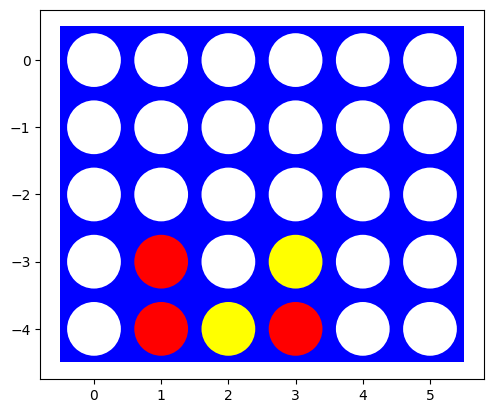

Analyzing 12 moves with 41 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(0.854), "('drop', 1)": np.float64(0.902), "('drop', 2)": np.float64(0.707), "('drop', 3)": np.float64(0.659), "('drop', 4)": np.float64(0.756), "('drop', 5)": np.float64(0.951), "('mean', 2, 0)": np.float64(0.61), "('mean', 2, 1)": np.float64(0.756), "('mean', 2, 2)": np.float64(0.561), "('mean', 2, 3)": np.float64(0.61), "('mean', 2, 4)": np.float64(0.561), "('mean', 2, 5)": np.float64(0.415)}
Nước đi tốt nhất được tìm thấy bởi PMCS: ('drop', 5)

--- Board 2 ---


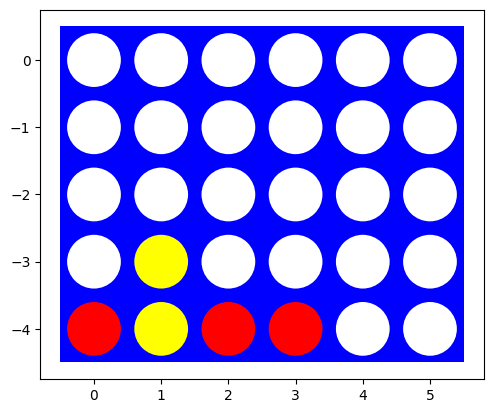

Analyzing 12 moves with 41 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(0.756), "('drop', 1)": np.float64(0.902), "('drop', 2)": np.float64(0.854), "('drop', 3)": np.float64(0.902), "('drop', 4)": np.float64(0.61), "('drop', 5)": np.float64(0.805), "('mean', 1, 0)": np.float64(0.463), "('mean', 1, 1)": np.float64(0.61), "('mean', 1, 2)": np.float64(0.61), "('mean', 1, 3)": np.float64(0.512), "('mean', 1, 4)": np.float64(0.512), "('mean', 1, 5)": np.float64(0.561)}
Nước đi tốt nhất được tìm thấy bởi PMCS: ('drop', 1)

--- Board 3 ---


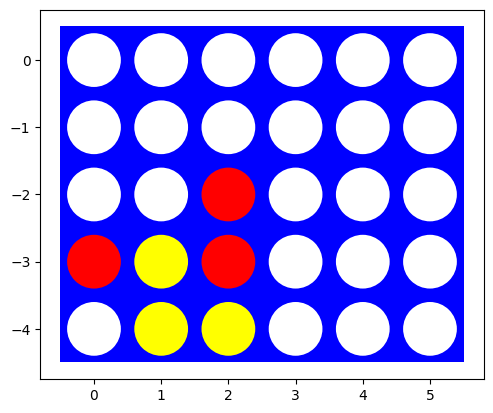

Analyzing 18 moves with 27 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(0.037), "('drop', 1)": np.float64(-0.333), "('drop', 2)": np.float64(-0.556), "('drop', 3)": np.float64(-0.037), "('drop', 4)": np.float64(0.037), "('drop', 5)": np.float64(0.111), "('mean', 1, 0)": np.float64(-0.704), "('mean', 1, 1)": np.float64(-0.852), "('mean', 1, 2)": np.float64(-0.778), "('mean', 1, 3)": np.float64(-0.852), "('mean', 1, 4)": np.float64(-0.926), "('mean', 1, 5)": np.float64(-0.926), "('mean', 2, 0)": np.float64(-0.259), "('mean', 2, 1)": np.float64(-0.407), "('mean', 2, 2)": np.float64(-0.333), "('mean', 2, 3)": np.float64(-0.259), "('mean', 2, 4)": np.float64(-0.407), "('mean', 2, 5)": np.float64(-0.333)}
Nước đi tốt nhất được tìm thấy bởi PMCS: ('drop', 5)

--- Board 4 ---


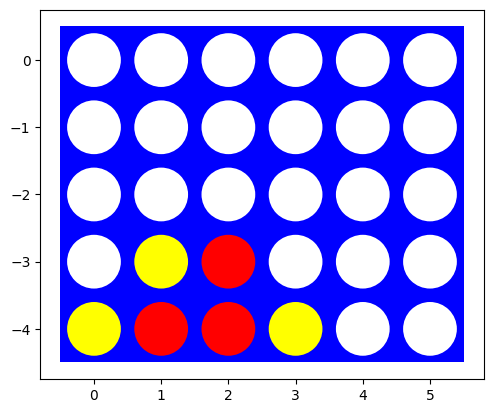

Analyzing 18 moves with 27 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(0.333), "('drop', 1)": np.float64(0.481), "('drop', 2)": np.float64(0.778), "('drop', 3)": np.float64(0.556), "('drop', 4)": np.float64(0.704), "('drop', 5)": np.float64(0.333), "('mean', 0, 0)": np.float64(-0.259), "('mean', 0, 1)": np.float64(0.111), "('mean', 0, 2)": np.float64(-0.037), "('mean', 0, 3)": np.float64(-0.407), "('mean', 0, 4)": np.float64(-0.333), "('mean', 0, 5)": np.float64(-0.111), "('mean', 3, 0)": np.float64(0.111), "('mean', 3, 1)": np.float64(-0.111), "('mean', 3, 2)": np.float64(0.037), "('mean', 3, 3)": np.float64(-0.111), "('mean', 3, 4)": np.float64(-0.111), "('mean', 3, 5)": np.float64(0.111)}
Nước đi tốt nhất được tìm thấy bởi PMCS: ('drop', 2)

--- Board 5 ---


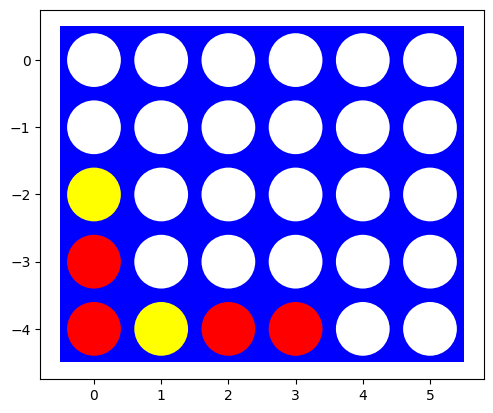

Analyzing 12 moves with 41 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(1.0), "('drop', 1)": np.float64(1.0), "('drop', 2)": np.float64(1.0), "('drop', 3)": np.float64(1.0), "('drop', 4)": np.float64(1.0), "('drop', 5)": np.float64(0.902), "('mean', 1, 0)": np.float64(0.902), "('mean', 1, 1)": np.float64(1.0), "('mean', 1, 2)": np.float64(0.951), "('mean', 1, 3)": np.float64(0.951), "('mean', 1, 4)": np.float64(0.951), "('mean', 1, 5)": np.float64(0.854)}
Nước đi tốt nhất được tìm thấy bởi PMCS: ('drop', 0)


In [78]:
def playout(board, player):
    """
    Thực hiện một ván chơi ngẫu nhiên từ một trạng thái bàn cờ cho trước,
    sử dụng `random_player` để chọn nước đi.
    Trả về utility cuối cùng của ván đấu.
    """
    current_board = board.copy()
    current_player = player
    
    while not terminal(current_board):
        # Kiểm tra xem có nước đi nào không
        if not actions(current_board, current_player):
            return 0 # Hòa nếu không còn nước đi

        # Sử dụng random_player đã định nghĩa trước đó để chọn hành động
        action = random_player(current_board, current_player)
        current_board = result(current_board, current_player, action)
        current_player = -current_player
        
    return utility(current_board)
def pmcs_player(board, player=1, N=100):
    """
    Agent sử dụng Pure Monte Carlo Search.
    N là tổng số playout sẽ được thực hiện.
    """
    possible_actions = actions(board, player)
    if not possible_actions:
        return None

    # Chia đều N playout cho các hành động có thể
    n_per_action = max(1, N // len(possible_actions))
    
    action_utilities = {}

    print(f"Analyzing {len(possible_actions)} moves with {n_per_action} playouts each...")

    for action in possible_actions:
        utilities = []
        # Trạng thái bàn cờ sau khi thực hiện hành động đầu tiên
        next_board = result(board, player, action)
        # Người chơi tiếp theo trong mô phỏng
        sim_player = -player
        
        for _ in range(n_per_action):
            # Thực hiện playout từ trạng thái next_board
            final_utility = playout(next_board, sim_player)
            utilities.append(final_utility)
        
        # Tính utility trung bình cho hành động này
        action_utilities[action] = np.mean(utilities)

    # Chọn hành động tốt nhất dựa trên utility
    # Nếu player là 1, ta muốn max utility. Nếu player là -1, ta muốn min utility.
    if player == 1:
        best_action = max(action_utilities, key=action_utilities.get)
    else: # player == -1
        best_action = min(action_utilities, key=action_utilities.get)
        
    print("Average utilities per action:", {str(k): round(v, 3) for k, v in action_utilities.items()})
    return best_action

# --- Thử nghiệm PMCS trên các bàn cờ đã tạo thủ công ---
print("--- Thử nghiệm Pure Monte Carlo Search (N=500) ---")
manual_boards = [board_1, board_2, board_3, board_4, board_5]
board_names = ["Board 1", "Board 2", "Board 3", "Board 4", "Board 5"]

for i, board in enumerate(manual_boards):
    print(f"\n--- {board_names[i]} ---")
    visualize(board)
    
    # Tìm nước đi tốt nhất bằng PMCS
    best_move = pmcs_player(board, player=1, N=500)
    
    print(f"Nước đi tốt nhất được tìm thấy bởi PMCS: {best_move}")

### Best First Move

How would you determine what the best first move for a standard board ($6 \times 7$) is? You can use Pure Monte Carlo Search or any algorithms that you have implemented above.

In [79]:
print("--- Tìm nước đi đầu tiên tốt nhất cho bàn cờ 6x7 bằng PMCS ---")

# Tạo một bàn cờ trống
empty_std_board = empty_board(shape=(6, 7))

# Sử dụng PMCS với số lượng lớn các playout để tìm nước đi tốt nhất
# N càng lớn, kết quả càng đáng tin cậy nhưng thời gian chạy càng lâu.
# N = 10000 là một khởi đầu tốt.
num_simulations = 10000
best_first_move = pmcs_player(empty_std_board, player=1, N=num_simulations)

print(f"\nSau {num_simulations} lần mô phỏng, nước đi đầu tiên tốt nhất được đề xuất là: {best_first_move}")

--- Tìm nước đi đầu tiên tốt nhất cho bàn cờ 6x7 bằng PMCS ---
Analyzing 7 moves with 1428 playouts each...
Average utilities per action: {"('drop', 0)": np.float64(0.539), "('drop', 1)": np.float64(0.567), "('drop', 2)": np.float64(0.521), "('drop', 3)": np.float64(0.555), "('drop', 4)": np.float64(0.535), "('drop', 5)": np.float64(0.529), "('drop', 6)": np.float64(0.525)}

Sau 10000 lần mô phỏng, nước đi đầu tiên tốt nhất được đề xuất là: ('drop', 1)
